<a href="https://colab.research.google.com/github/Maheshwari241/Data-analytics-and-report/blob/main/data_Analytics_and_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics And Reporting
### The goal of this project is to accurately predict the Length of Stay for each patient so that the hospitals can optimize resources and function better.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')

In [74]:
# Importing datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Data Exploration

### Overview of Data

In [75]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [76]:
train.info()
train.Stay.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173917 entries, 0 to 173916
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            173917 non-null  int64  
 1   Hospital_code                      173917 non-null  int64  
 2   Hospital_type_code                 173917 non-null  object 
 3   City_Code_Hospital                 173917 non-null  int64  
 4   Hospital_region_code               173917 non-null  object 
 5   Available Extra Rooms in Hospital  173917 non-null  int64  
 6   Department                         173917 non-null  object 
 7   Ward_Type                          173917 non-null  object 
 8   Ward_Facility_Code                 173917 non-null  object 
 9   Bed Grade                          173852 non-null  float64
 10  patientid                          173917 non-null  int64  
 11  City_Code_Patient                  1717

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100', nan],
      dtype=object)

In [77]:
# NA values in train dataset
train.isnull().sum().sort_values(ascending = False)

City_Code_Patient                    2146
Bed Grade                              65
Stay                                    1
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Hospital_code                           0
patientid                               0
Hospital_type_code                      0
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
case_id                                 0
dtype: int64

In [78]:
# NA values in test dataset
test.isnull().sum().sort_values(ascending = False)

City_Code_Patient                    2157
Bed Grade                              35
case_id                                 0
Age                                     0
Visitors with Patient                   0
Severity of Illness                     0
Type of Admission                       0
patientid                               0
Ward_Facility_Code                      0
Hospital_code                           0
Ward_Type                               0
Department                              0
Available Extra Rooms in Hospital       0
Hospital_region_code                    0
City_Code_Hospital                      0
Hospital_type_code                      0
Admission_Deposit                       0
dtype: int64

In [79]:
# Dimension of train dataset
train.shape

(173917, 18)

In [80]:
# Dimension of test dataset
test.shape

(137057, 17)

In [81]:
# Number of distinct observations in train dataset
for i in train.columns:
    print(i, ':', train[i].nunique())

case_id : 173917
Hospital_code : 32
Hospital_type_code : 7
City_Code_Hospital : 11
Hospital_region_code : 3
Available Extra Rooms in Hospital : 17
Department : 5
Ward_Type : 6
Ward_Facility_Code : 6
Bed Grade : 4
patientid : 38546
City_Code_Patient : 36
Type of Admission : 3
Severity of Illness : 3
Visitors with Patient : 28
Age : 10
Admission_Deposit : 6844
Stay : 11


In [82]:
# Number of distinct observations in test dataset
for i in test.columns:
    print(i, ':', test[i].nunique())

case_id : 137057
Hospital_code : 32
Hospital_type_code : 7
City_Code_Hospital : 11
Hospital_region_code : 3
Available Extra Rooms in Hospital : 15
Department : 5
Ward_Type : 6
Ward_Facility_Code : 6
Bed Grade : 4
patientid : 39607
City_Code_Patient : 37
Type of Admission : 3
Severity of Illness : 3
Visitors with Patient : 27
Age : 10
Admission_Deposit : 6609


### Data Preparation

In [83]:
#Replacing NA values in Bed Grade Column for both Train and Test datssets
train['Bed Grade'].fillna(train['Bed Grade'].mode()[0], inplace = True)
test['Bed Grade'].fillna(test['Bed Grade'].mode()[0], inplace = True)

In [84]:
#Replacing NA values in  Column for both Train and Test datssets
train['City_Code_Patient'].fillna(train['City_Code_Patient'].mode()[0], inplace = True)
test['City_Code_Patient'].fillna(test['City_Code_Patient'].mode()[0], inplace = True)

In [85]:
# Label Encoding Stay column in train dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Stay'] = le.fit_transform(train['Stay'].astype('str'))

In [86]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,4


In [87]:
#Imputing dummy Stay column in test datset to concatenate with train dataset
test['Stay'] = -1
df = pd.concat([train, test])
df.shape

(310974, 18)

In [88]:
#Label Encoding all the columns in Train and test datasets
for i in ['Hospital_type_code', 'Hospital_region_code', 'Department',
          'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].astype(str))

In [89]:
#Spearating Train and Test Datasets
train = df[df['Stay']!=-1]
test = df[df['Stay']==-1]

### Feature Engineering

In [90]:
def get_countid_enocde(train, test, cols, name):
  temp = train.groupby(cols)['case_id'].count().reset_index().rename(columns = {'case_id': name})
  temp2 = test.groupby(cols)['case_id'].count().reset_index().rename(columns = {'case_id': name})
  train = pd.merge(train, temp, how='left', on= cols)
  test = pd.merge(test,temp2, how='left', on= cols)
  train[name] = train[name].astype('float')
  test[name] = test[name].astype('float')
  train[name].fillna(np.median(temp[name]), inplace = True)
  test[name].fillna(np.median(temp2[name]), inplace = True)
  return train, test

In [91]:
train, test = get_countid_enocde(train, test, ['patientid'], name = 'count_id_patient')
train, test = get_countid_enocde(train, test,
                                 ['patientid', 'Hospital_region_code'], name = 'count_id_patient_hospitalCode')
train, test = get_countid_enocde(train, test,
                                 ['patientid', 'Ward_Facility_Code'], name = 'count_id_patient_wardfacilityCode')

In [92]:
# Droping duplicate columns
test1 = test.drop(['Stay', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)
train1 = train.drop(['case_id', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)

In [93]:
# Splitting train data for Naive Bayes and XGBoost
X1 = train1.drop('Stay', axis =1)
y1 = train1['Stay']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size =0.20, random_state =100)

## Models

### Naive Bayes Model

In [94]:
from sklearn.naive_bayes import GaussianNB
target = y_train.values
features = X_train.values
classifier_nb = GaussianNB()
model_nb = classifier_nb.fit(features, target)

In [95]:
prediction_nb = model_nb.predict(X_test)
from sklearn.metrics import accuracy_score
acc_score_nb = accuracy_score(prediction_nb,y_test)
print("Acurracy:", acc_score_nb*100)

Acurracy: 35.55370285188593


### XGBoost Model

In [96]:
import xgboost
classifier_xgb = xgboost.XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=800,
                                  objective='multi:softmax', reg_alpha=0.5, reg_lambda=1.5,
                                  booster='gbtree', n_jobs=4, min_child_weight=2, base_score= 0.75)

In [97]:
model_xgb = classifier_xgb.fit(X_train, y_train)

In [98]:
prediction_xgb = model_xgb.predict(X_test)
acc_score_xgb = accuracy_score(prediction_xgb,y_test)
print("Accuracy:", acc_score_xgb*100)

Accuracy: 43.8333716651334


### Logistic Regression

In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [100]:
# Assuming the last column contains the target variable
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target variable (binary labels)


In [101]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
# Initializing logistic regression model
model = LogisticRegression(max_iter=1000)


In [103]:
# Training the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [104]:
# Making predictions on the testing set
y_pred = model.predict(X_test)


In [116]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 59.41474395047833


# Predictions

In [117]:
# Naive Bayes
pred_nb = classifier_nb.predict(test1.iloc[:,1:])
result_nb = pd.DataFrame(pred_nb, columns=['Stay'])
result_nb['case_id'] = test1['case_id']
result_nb = result_nb[['case_id', 'Stay']]

In [118]:
result_nb['Stay'] = result_nb['Stay'].replace({0:'0-10', 1: '11-20', 2: '21-30', 3:'31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'})
result_nb.head()

,case_id,Stay
0,318439,21-30
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,31-40


In [108]:
# XGBoost
pred_xgb = classifier_xgb.predict(test1.iloc[:,1:])
result_xgb = pd.DataFrame(pred_xgb, columns=['Stay'])
result_xgb['case_id'] = test1['case_id']
result_xgb = result_xgb[['case_id', 'Stay']]

In [109]:
result_xgb['Stay'] = result_xgb['Stay'].replace({0:'0-10', 1: '11-20', 2: '21-30', 3:'31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'})
result_xgb.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


In [119]:
# Making predictions using logistic regression
pred_lr = model.predict(X_test)

In [120]:
 #Creating a DataFrame with logistic regression predictions
result_lr = pd.DataFrame(pred_lr, columns=['Stay'])
result_lr['case_id'] = test['case_id']
result_lr = result_lr[['case_id', 'Stay']]
result_lr['Stay'] = result_lr['Stay'].replace({0: '0-10', 1: '11-20', 2: '21-30', 3: '31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'})
result_lr.head()


,case_id,Stay
0,318439,21-30
1,318440,21-30
2,318441,21-30
3,318442,21-30
4,318443,-1


## Results

In [112]:
# Naive Bayes
print(result_nb.groupby('Stay')['case_id'].nunique())

Stay
0-10                   2068
11-20                 18860
21-30                 78702
31-40                 15702
41-50                   685
51-60                 15934
61-70                   227
71-80                   733
81-90                   531
91-100                  347
More than 100 Days     3268
Name: case_id, dtype: int64


In [113]:
# XGBoost
print(result_xgb.groupby('Stay')['case_id'].nunique())

Stay
0-10                   3842
11-20                 33501
21-30                 63432
31-40                 11263
41-50                   104
51-60                 20623
61-70                    39
71-80                   447
81-90                  1406
91-100                  127
More than 100 Days     2273
Name: case_id, dtype: int64


In [123]:
# logistic regression
print(result_lr.groupby('Stay')['case_id'].nunique())

Stay
-1       28063
21-30    34132
Name: case_id, dtype: int64


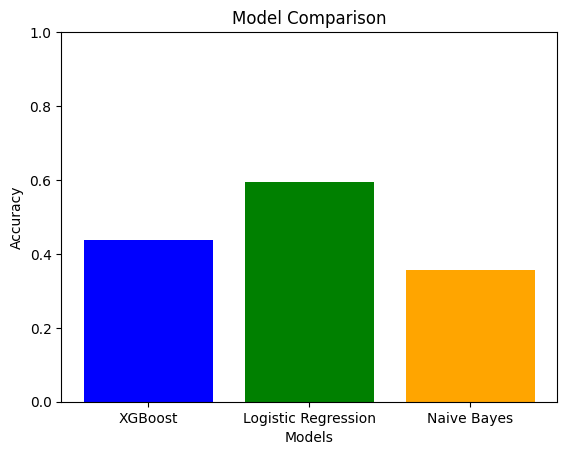

In [126]:
# Bar chart
models = ['XGBoost', 'Logistic Regression', 'Naive Bayes']
accuracies = [acc_score_xgb, accuracy, acc_score_nb]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for accuracy
plt.show()